In [1]:
import os
from InputDataProcessor import InputDataProcessor 
from distributeFunctions import distribute_100
from dataFilters import coffee_filter
from genericModel import train, evaluate, test, predict
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from ModelConfig import ModelConfig

2024-05-08 19:47:53.047695: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 19:47:54.371059: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-05-08 19:47:54.371186: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

In [2]:
idp=InputDataProcessor(bucket_name='aiml_harveen', use_case='handwritten_digits/classification', file_name='X.npy')

In [24]:
idp2=InputDataProcessor(bucket_name='aiml_harveen', use_case='handwritten_digits/classification', file_name='y.npy')

In [9]:
X=idp.loadNumpy()

handwritten_digits/classification/orig_data/X.npy


In [25]:
y=idp2.loadNumpy()

handwritten_digits/classification/orig_data/y.npy


In [36]:
import matplotlib.pyplot as plt
X_random_reshaped = X[0].reshape((20,20))

plt.imshow(X_random_reshaped, cmap='gray')
plt.title("Title")
plt.axis('off')

ValueError: cannot reshape array of size 400 into shape (6,6)

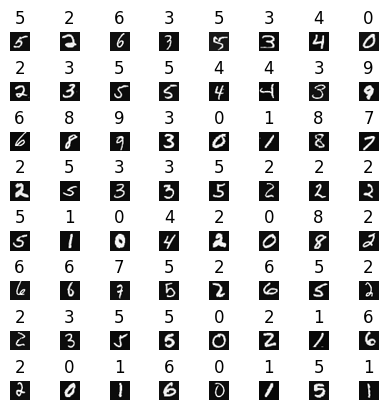

In [29]:
import warnings
import matplotlib.pyplot as plt
##warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(4,4))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [3]:
idp.prepareCsvModelInputData(coffee_filter,distribute_100)

In [4]:
os.environ["AIP_TRAINING_DATA_URI"] = "gs://aiml_harveen/coffee/classification/training_data/coffeeData.csv"
os.environ["AIP_VALIDATION_DATA_URI"] = "gs://aiml_harveen/coffee/classification/dev_data/coffeeData.csv"
os.environ["AIP_TEST_DATA_URI"] = "gs://aiml_harveen/coffee/classification/test_data/coffeeData.csv"
os.environ["AIP_MODEL_DIR"] = "gs://aiml_harveen/coffee/classification/coffee_model"

In [5]:
modelConfig=ModelConfig(
    model_type="classification",
    layers=["sigmoid","sigmoid"],
    neurons=[3,1],
    epochs=10,
    loss=BinaryCrossentropy(),
    optimizer=Adam(learning_rate=0.01))

2024-05-08 17:44:25.963052: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-05-08 17:44:25.964318: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-08 17:44:25.964416: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (instance-20240502-111332): /proc/driver/nvidia/version does not exist
2024-05-08 17:44:25.974653: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow 

In [6]:
train(modelConfig)
#evaluate()
#test()
#predict(avg_temp=13.9,min_temp=10,max_temp=17.4,wind_dir=73,wind_speed=5.9,pressure=1010.3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6250/6250 [==============================] - 10s 1ms/step - loss: 0.1823
Epoch 2/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.1156
Epoch 3/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0353
Epoch 4/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0156
Epoch 5/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0099
Epoch 6/10
6250/6250 [==================

INFO:tensorflow:Assets written to: gs://aiml_harveen/coffee/classification/coffee_model/assets


INFO:tensorflow:Assets written to: gs://aiml_harveen/coffee/classification/coffee_model/assets
